In [0]:
!pip install tensorflow==1.15

In [0]:
#Linear regression algorithm

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [0]:
from sklearn import datasets
diabetes=datasets.load_diabetes()
X_train=diabetes.data[:,np.newaxis,2]
Y_train=diabetes.target[:,np.newaxis]

In [0]:
#tf.placeholder : 변수선언/ 하나의 변수가 아니라 다양한 값을 담을 수 있음
X=tf.placeholder(dtype=tf.float32)
Y=tf.placeholder(dtype=tf.float32)

In [0]:
#tf.Variable : 변수설정
#np.random.randint : 균일분포의 정수 난수 1개 생성
#np.random.rand : 0부터 1까지의 균일분포에서 난수 matrix array 생성
#np.random.randn : 가우시안 표준 정규분포에서 난수 matrix array 생성

W=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())

S=tf.add(tf.multiply(W,X), b)

In [0]:
#tf.reduce_mean() : 설정한 축에 대해서 평균을 구해줌
hypothesis = S
loss=tf.reduce_mean(tf.pow(hypothesis-Y,2))

 TensorFlow는 모든 연산을 자체적으로 CPU에서 하는 것이 아니라, 외부(다른 컴퓨터)에 분산되어 있는 GPU에서 처리한다고 가정한다. 
 
 따라서 변수의 값을 할당하는 아주 간단한 연산부터 복잡한 선형대수연산까지 프로그램이 돌아가는 컴퓨터 자체 내에서 이루어지는 것은 없다.

 TensorFlow에는 텐서(Tensor) 계산 과정은 모두 그래프(Graph)라고 부르는 객체 내에 저장된다. 그래프를 계산하려면 외부 컴퓨터에 이 그래프 정보를 전달하고 그 결과값을 받아야 한다. 이 통신과정을 담당하는 것이 세션(Session)이라고 부르는 객체이다.

 따라서 모든 텐서 계산은, 해당 텐서를 포함하는 그래프를 세션(Session) 객체에 전달하여 원격 실행한 후에 값을 볼 수 있다. 변수에 상수를 할당하는 아주 간단한 연산 조차도 마찬가지이다. 
 
일관성을 위해 이러한 과정은 GPU를 사용하지 않거나 분산처리를 하지 않더라도 동일한 방식으로 처리한다.

세션 생성: Session / 세션 사용: run / 세션 종료: close


epoch: 0100, loss: 5751.693847656
epoch: 0200, loss: 5590.617675781
epoch: 0300, loss: 5443.482421875
epoch: 0400, loss: 5309.080078125
epoch: 0500, loss: 5186.308105469
epoch: 0600, loss: 5074.163574219
epoch: 0700, loss: 4971.721679688
epoch: 0800, loss: 4878.145996094
epoch: 0900, loss: 4792.670410156
epoch: 1000, loss: 4714.589843750
epoch: 1100, loss: 4643.268554688
epoch: 1200, loss: 4578.118164062
epoch: 1300, loss: 4518.607421875
epoch: 1400, loss: 4464.245605469
epoch: 1500, loss: 4414.588378906
epoch: 1600, loss: 4369.229003906
epoch: 1700, loss: 4327.794921875
epoch: 1800, loss: 4289.946289062
epoch: 1900, loss: 4255.373535156
epoch: 2000, loss: 4223.792480469
epoch: 2100, loss: 4194.945312500
epoch: 2200, loss: 4168.593750000
epoch: 2300, loss: 4144.522949219
epoch: 2400, loss: 4122.536621094
epoch: 2500, loss: 4102.451171875
epoch: 2600, loss: 4084.103271484
epoch: 2700, loss: 4067.344482422
epoch: 2800, loss: 4052.036132812
epoch: 2900, loss: 4038.052978516
epoch: 3000, l

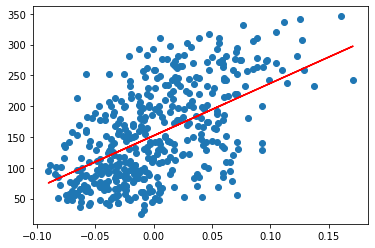

In [0]:
learning_rate=0.1
epochs=5000

optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


#tf.gloabal_variables_initializer() : 그래프 내의 모든 변수의 초기화 연산을 한꺼번에 수행함(항상 첫번째로 실행해줘야한다)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(epochs): #전체 데이터셋에 대해서 5000번 반복 진행
    sess.run(optimizer, feed_dict={X:X_train, Y:Y_train}) #feed_dict를 이용해서 placeholder(빈공간;X,Y)값에 데이터(X_train,Y_train)를 dictionary 형태로 입력함

    if(epoch+1)%100 == 0: #100번 마다 출력해줌
      loss_val=sess.run(loss,feed_dict={X:X_train, Y:Y_train}) #X_train과 Y_train에 대해서 loss값 출력
      print("epoch: {:04d}, loss: {:.9f}".format(epoch+1, loss_val))

  print("Learning finished.")

  plt.scatter(X_train, Y_train)
  Y_hat=sess.run(W) * X_train + sess.run(b)
  plt.plot(X_train, Y_hat, 'red')



# 아래의 구문을 사용하거나 위의 with~as 구문을 사용할 수 있음
# sess=tf.Session()
# sess.run(tf.gloabl_variables_initializer())
# sess.close()

In [0]:
#Artifical neural networks

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
sample_1=mnist.train.images[47].reshape(28,28) #48번째에 있는 샘플 이미지를 가져옴

In [0]:
sample_label_1=np.where(mnist.train.labels[47]==1)[0][0] #one-hot encoding : 해당하는 값(True)만 1이고, 나머지는 모두 0인 벡터

y=4


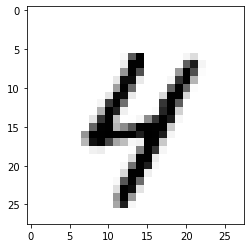

In [0]:
print("y={}".format(sample_label_1))
plt.imshow(sample_1, cmap='Greys')

In [0]:
X=tf.placeholder(dtype=tf.float32, shape=[None, 784]) #28 by 28 로 만들었으므로 28*28=784 dim(차원)이 된다.
Y=tf.placeholder(dtype=tf.float32, shape=[None,10]) #dim(784 또는 10)을 설정해주면 자동으로 None 값이 채워진다.

W=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([10]))
S=tf.matmul(X,W)+b

In [0]:
hypothesis=S
loss=tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))

corrects=tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y,axis=1))
accuracy=tf.reduce_mean(tf.cast(corrects, tf.float32))

In [0]:
#ANNs with hidden layers

X=tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y=tf.placeholder(dtype=tf.float32, shape=[None, 10])

#hidden layer 1
W1=tf.Variable(tf.random_normal([784,256])) #784차원을 256차원으로 줄여줌
b1=tf.Variable(tf.random_normal([256]))
Z1=tf.nn.sigmoid(tf.matmul(X,W1) + b1)

#hidden layer 2
W2=tf.Variable(tf.random_normal([256,10])) #256차원을 10차원으로 줄여줌
b2=tf.Variable(tf.random_normal([10]))
S2=tf.matmul(Z1,W2) + b2 #마지막 layer는 activation function(sigmoid) 해주지 않음

In [0]:
hypothesis=S2
loss=tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))

corrects=tf.equal(tf.argmax(hypothesis,axis=1), tf.argmax(Y,axis=1))
accuracy=tf.reduce_mean(tf.cast(corrects, tf.float32))

In [0]:
learning_rate=0.001
epochs=50
batch_size=100 #MNIST dataset은 학습데이터의 양이 너무 많아서(60000개), batch-gradient-descent로 진행한다.

optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Epoch: 전체 데이터 셋을 몇번 볼것인지 결정

batch_size: 전체 데이터셋을 몇개의 단위로 나눠서 학습을 진행할 것인지 결정

In [0]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for epoch in range(epochs):

    # for _ : for문을 진행하면서 인덱스를 따로 출력해주진 않음
    for _ in range(int(mnist.train.num_examples / batch_size)): # 전체데이터셋/batch_size
      X_batch, Y_batch=mnist.train.next_batch(batch_size) # next_batch() : 학습데이터 중에서 100개(batch_size만큼)만 계속 가져옴
      sess.run(optimizer, feed_dict={X: X_batch, Y: Y_batch})

    if (epoch+1)%1==0:
      acc_val=sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
      print("epoch: {:04d}, accuracy: {:.2f}".format(epoch+1, acc_val))

  print("Learning finished.")


epoch: 0001, accuracy: 0.12
epoch: 0002, accuracy: 0.14
epoch: 0003, accuracy: 0.17
epoch: 0004, accuracy: 0.20
epoch: 0005, accuracy: 0.23
epoch: 0006, accuracy: 0.27
epoch: 0007, accuracy: 0.30
epoch: 0008, accuracy: 0.32
epoch: 0009, accuracy: 0.35
epoch: 0010, accuracy: 0.38
epoch: 0011, accuracy: 0.40
epoch: 0012, accuracy: 0.42
epoch: 0013, accuracy: 0.44
epoch: 0014, accuracy: 0.45
epoch: 0015, accuracy: 0.47
epoch: 0016, accuracy: 0.48
epoch: 0017, accuracy: 0.50
epoch: 0018, accuracy: 0.51
epoch: 0019, accuracy: 0.52
epoch: 0020, accuracy: 0.53
epoch: 0021, accuracy: 0.54
epoch: 0022, accuracy: 0.55
epoch: 0023, accuracy: 0.56
epoch: 0024, accuracy: 0.57
epoch: 0025, accuracy: 0.58
epoch: 0026, accuracy: 0.58
epoch: 0027, accuracy: 0.59
epoch: 0028, accuracy: 0.60
epoch: 0029, accuracy: 0.60
epoch: 0030, accuracy: 0.61
epoch: 0031, accuracy: 0.62
epoch: 0032, accuracy: 0.62
epoch: 0033, accuracy: 0.63
epoch: 0034, accuracy: 0.63
epoch: 0035, accuracy: 0.64
epoch: 0036, accurac

우리는 MNIST데이터에 대해서 'Gradient Descent Optimizer'을 사용했지만, Adam과 같이 다른 optimzier을 사용하면 성능이 더 좋아지는 것을 볼 수 있다.